In [1]:
%cd ~/SSMuLA

/disk2/fli/SSMuLA


In [2]:
%load_ext autoreload
%autoreload 2
%load_ext blackcellmagic

Loading BokehJS ...

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
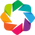

/disk2/fli/miniconda3/envs/SSMuLA/lib/python3.10/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [3]:
from ast import literal_eval

import pandas as pd

from scipy.stats import spearmanr, ttest_ind

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap, to_rgb
import seaborn as sns

# import bokeh
# from bokeh.io import show, export_svg, export_png, output_notebook
# from bokeh.plotting import show, figure
# from bokeh.themes.theme import Theme

# import holoviews as hv
# from holoviews import opts, dim

# # for html to png
# from selenium import webdriver
# from selenium.webdriver.firefox.service import Service
# from selenium.webdriver.firefox.options import Options

from SSMuLA.landscape_global import LIB_INFO_DICT
# from SSMuLA.de_simulations import DE_TYPES
from SSMuLA.zs_analysis import ZS_OPTS, ZS_COMB_OPTS
from SSMuLA.vis_summary import ZS_METRICS, ZS_COLOR_MAP_APPENDED, ZS_OPTS_APPENDED
# from SSMuLA.get_corr import LANDSCAPE_ATTRIBUTES, val_list, zs_list
from SSMuLA.vis import PRESENTATION_PALETTE_SATURATE, save_plt
# from SSMuLA.util import checkNgen_folder


# get msa factors
from SSMuLA.zs_data import EV_META
# from SSMuLA.landscape_global import get_file_name, n_mut_cutoff_dict
# from SSMuLA.de_simulations import DE_TYPES
from SSMuLA.zs_analysis import ZS_OPTS, ZS_COMB_OPTS, ZS_OPTS_LEGEND
from SSMuLA.vis_summary import N_SAMPLE_LIST, N_MUT_SUBS, ZS_METRICS, ZS_N_MUTS
# from SSMuLA.vis import LIB_COLORS, save_bokeh_hv
# from SSMuLA.util import checkNgen_folder

%matplotlib inline

In [4]:
# Custom colormap for the MSE row, using greens
cmap_mse = LinearSegmentedColormap.from_list(
    "mse_cmap_r", ["#FFFFFF", "#9bbb59"][::-1], N=100
)  # dark to light green

# Create the colormap
custom_cmap = LinearSegmentedColormap.from_list(
    "bwg",
    [
        PRESENTATION_PALETTE_SATURATE["blue"],
        "white",
        PRESENTATION_PALETTE_SATURATE["green"],
    ],
    N=100,
)

custom_cmap_r = LinearSegmentedColormap.from_list(
    "bwg_r",
    [
        sns.dark_palette("seagreen").as_hex()[-1],
        "white",
        sns.color_palette("Blues").as_hex()[-1],
    ],
    N=100,
)

de_metrics = ["mean_all", "fraction_max"]

simple_des = {
    "recomb_SSM": "Recomb",
    "single_step_DE": "Single step",
    "top96_SSM": "Top96 recomb",
}

five_zs = {
 'ed_score': PRESENTATION_PALETTE_SATURATE["orange"],
 'Triad_score': PRESENTATION_PALETTE_SATURATE["blue"],
 'ev_score': PRESENTATION_PALETTE_SATURATE["green"],
 'esm_score': PRESENTATION_PALETTE_SATURATE["purple"],
 'esmif_score': PRESENTATION_PALETTE_SATURATE["yellow"],
 "coves_score": PRESENTATION_PALETTE_SATURATE["brown"]}

In [5]:
zs_csv = "results/zs_sum_4/none/zs_stat_scale2max.csv"

n_mut = "all"
metricr = "rho"

In [6]:
zs_df = pd.read_csv(zs_csv)
zs_df

,lib,n_mut,scale_type,ed_score,Triad_score,ev_score,esm_score,esmif_score,coves_score,Triad-ev_score,Triad-esm_score,struc-comb_score,msanoif-comb_score,msa-comb_score,structnmsa-comb_score,two-best_score
0,DHFR,all,max,"{'rho': 0.25115364784680605, 'ndcg': 0.9148031...","{'rho': 0.017800602737355977, 'ndcg': 0.874706...","{'rho': 0.3396500541186067, 'ndcg': 0.94705812...","{'rho': 0.2997147334642927, 'ndcg': 0.93412887...","{'rho': 0.3420102237927515, 'ndcg': 0.94530250...","{'rho': -0.0340652892242752, 'ndcg': 0.8749346...","{'rho': 0.23090332337249703, 'ndcg': 0.9008350...","{'rho': 0.20424667302483043, 'ndcg': 0.8962477...","{'rho': 0.21873645360229155, 'ndcg': 0.9010558...","{'rho': 0.3329620349497645, 'ndcg': 0.94020086...","{'rho': 0.35054254084284997, 'ndcg': 0.9449015...","{'rho': 0.3152181002051771, 'ndcg': 0.92293221...","{'rho': 0.3572732194614853, 'ndcg': 0.94923945..."
1,GB1,all,max,"{'rho': 0.1449275437059576, 'ndcg': 0.68739614...","{'rho': 0.2882819770014877, 'ndcg': 0.76404913...","{'rho': 0.18950853197890194, 'ndcg': 0.7215575...","{'rho': 0.08033543850645883, 'ndcg': 0.7016796...","{'rho': 0.29349648314848165, 'ndcg': 0.7536404...","{'rho': 0.2642675382803584, 'ndcg': 0.73724809...","{'rho': 0.27981217554750343, 'ndcg': 0.7521803...","{'rho': 0.21772991088329988, 'ndcg': 0.7424266...","{'rho': 0.3165424232001679, 'ndcg': 0.76648219...","{'rho': 0.14175871216515606, 'ndcg': 0.7115697...","{'rho': 0.21368724000610942, 'ndcg': 0.7341220...","{'rho': 0.2591091741511955, 'ndcg': 0.74743562...","{'rho': 0.2707210453110122, 'ndcg': 0.74809457..."
2,ParD2,all,max,"{'rho': 0.2975524544704858, 'ndcg': 0.94358830...","{'rho': 0.22903279275812125, 'ndcg': 0.9096686...","{'rho': 0.43950580411448875, 'ndcg': 0.9509634...","{'rho': 0.5086085705240099, 'ndcg': 0.96848213...","{'rho': 0.5474025505415586, 'ndcg': 0.96654986...","{'rho': 0.5495115971725073, 'ndcg': 0.95702682...","{'rho': 0.4306774463016622, 'ndcg': 0.94973751...","{'rho': 0.4543061185610589, 'ndcg': 0.95563704...","{'rho': 0.4307416392960829, 'ndcg': 0.94590129...","{'rho': 0.5060856131857661, 'ndcg': 0.96738107...","{'rho': 0.5578082401554308, 'ndcg': 0.97195573...","{'rho': 0.5462223690973439, 'ndcg': 0.96811505...","{'rho': 0.5460002992284186, 'ndcg': 0.96682268..."
3,ParD3,all,max,"{'rho': 0.45637056042996815, 'ndcg': 0.9695382...","{'rho': 0.2850094413250776, 'ndcg': 0.92655737...","{'rho': 0.46081667207091903, 'ndcg': 0.9712806...","{'rho': 0.5831577250662513, 'ndcg': 0.98204147...","{'rho': 0.6010278304483516, 'ndcg': 0.96236309...","{'rho': 0.6219880633980583, 'ndcg': 0.96633567...","{'rho': 0.5386802032349772, 'ndcg': 0.95858089...","{'rho': 0.6205810094850255, 'ndcg': 0.96546870...","{'rho': 0.48086112698498235, 'ndcg': 0.9456578...","{'rho': 0.5431052882445438, 'ndcg': 0.97931590...","{'rho': 0.6111206470597818, 'ndcg': 0.97596838...","{'rho': 0.6499730615911018, 'ndcg': 0.97073551...","{'rho': 0.5919584300701194, 'ndcg': 0.96673702..."
4,T7,all,max,"{'rho': 0.01918678236578083, 'ndcg': 0.9038442...","{'rho': 0.07269101772642905, 'ndcg': 0.8957020...",{},{},{},{},{},{},{},{},{},{},{}
5,TEV,all,max,"{'rho': 0.1361796001261505, 'ndcg': 0.99133865...","{'rho': 0.11768203853394157, 'ndcg': 0.9914065...",{},{},{},{},{},{},{},{},{},{},{}
6,TrpB3A,all,max,"{'rho': 0.17765764365707418, 'ndcg': 0.9875434...","{'rho': -0.09805055619421527, 'ndcg': 0.981718...","{'rho': 0.1309686909154868, 'ndcg': 0.98910504...","{'rho': 0.1992294634923689, 'ndcg': 0.98892047...","{'rho': 0.1848187734802036, 'ndcg': 0.98972581...","{'rho': 0.1802324182916396, 'ndcg': 0.98567987...","{'rho': 0.009716942967770181, 'ndcg': 0.984727...","{'rho': 0.04973132221629352, 'ndcg': 0.9850511...","{'rho': 0.04240529262441126, 'ndcg': 0.9850867...","{'rho': 0.16904314947804597, 'ndcg': 0.9893348...","{'rho': 0.1802074618735106, 'ndcg': 0.98954086...","{'rho': 0.11820848404960753, 'ndcg': 0.9865950...","{'rho': 0.16399621754912488, 'ndcg': 0.9894297..."
7,TrpB3B,all,max,"{'rho': 0.02113748

In [7]:
ZS_COMB_OPTS

['Triad-ev_score',
 'Triad-esm_score',
 'struc-comb_score',
 'msanoif-comb_score',
 'msa-comb_score',
 'structnmsa-comb_score',
 'two-best_score']

In [8]:
n_mut = "all"

zs_df_list = [zs_df[["lib", "n_mut"]]]
# Create new columns for each score type
for c in ZS_OPTS + ZS_COMB_OPTS:

    zs_name = c.replace("_score", "")
    zs_df_list.append(
        zs_df[f"{zs_name}_score"]
        .str.replace(": nan", ": None")
        .apply(literal_eval)
        .apply(pd.Series)
        .rename(columns={m: f"{zs_name}_{m}" for m in ZS_METRICS})
    )

zs_df_expend = pd.concat(zs_df_list, axis=1)

zs_mut_df_list = [zs_df_expend[zs_df_expend["n_mut"] == n_mut]["lib"]]
for n_mut in ZS_N_MUTS:
    slice_df = (
        zs_df_expend[zs_df_expend["n_mut"] == n_mut]
        .drop(columns=["lib", "n_mut"])
        .reset_index(drop=True)
    )
    zs_mut_df_list.append(
        slice_df.rename(columns={c: f"{n_mut}_{c}" for c in slice_df.columns})
    )
zs_df = pd.concat(zs_mut_df_list, axis=1)
zs_df

,lib,all_ed_rho,all_ed_ndcg,all_ed_rocauc,all_Triad_rho,all_Triad_ndcg,all_Triad_rocauc,all_ev_rho,all_ev_ndcg,all_ev_rocauc,...,single_msanoif-comb_rocauc,single_msa-comb_rho,single_msa-comb_ndcg,single_msa-comb_rocauc,single_structnmsa-comb_rho,single_structnmsa-comb_ndcg,single_structnmsa-comb_rocauc,single_two-best_rho,single_two-best_ndcg,single_two-best_rocauc
0,DHFR,0.251154,0.914803,0.719973,0.017801,0.874707,0.452238,0.339650,0.947058,0.912765,...,0.917361,0.553279,0.891577,0.911111,-0.212895,0.800908,0.320833,0.555344,0.897379,0.900000
1,GB1,0.144928,0.687396,0.577572,0.288282,0.764049,0.715632,0.189509,0.721558,0.627690,...,0.588512,0.774073,0.784778,0.897363,0.811746,0.786033,0.916196,0.779265,0.788547,0.898305
2,ParD2,0.297552,0.943588,0.552103,0.229033,0.909669,0.652049,0.439506,0.950963,0.664011,...,0.842105,0.676766,0.977412,0.947368,0.687594,0.988506,0.964912,0.674367,0.976621,0.947368
3,ParD3,0.456371,0.969538,0.564976,0.285009,0.926557,0.906254,0.460817,0.971281,0.705520,...,NaN,0.369282,0.995510,NaN,0.337783,0.993260,NaN,0.362577,0.995431,NaN
4,T7,0.019187,0.903844,0.625880,0.072691,0.895702,0.501385,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,TEV,0.136180,0.991339,0.562561,0.117682,0.991407,0.597793,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,TrpB3A,0.177658,0.987543,0.608694,-0.098051,0.981719,0.664616,0.130969,0.989105,0.657328,...,0.862269,0.428879,0.967964,0.850694,0.191181,0.877321,0.646991,0.441304,0.967677,0.863426
7,TrpB3B,0.021137,0.987234,0.551217,-0.006996,0.983923,0.653659,0.074495,0.988502,0.583225,...,0.975309,0.352419,0.972462,0.981481,0.176627,0.941640,0.796296,0.367140,0.975559,0.972222
8,TrpB3C,0.064914,0.983205,0.605496,0.059073,0.984695,0.621564,0.111510,0.984379,0.539872,...,0.981818,0.361055,0.959543,1.000000,0.277220,0.954619,0.996970,0.386139,0.950518,0.993939
9,TrpB3D,0.113428,0.972850,0.609910,0.200644,0.974295,0.751696,0.229525,0.980522,0.785684,...,0.745658,0.400376,0.867780,0.682382,0.378123,0.831905,0.699132,0.377664,0.851802,0.678040


In [9]:
lib_df = pd.read_csv("results/fitness_distribution/max/all_lib_stats.csv", index_col=0)
lib_stat_all = lib_df[lib_df["n_mut_cuttoff"] == 0]

lib_stat = pd.concat(
    [
        lib_stat_all["lib"],
        lib_stat_all["lib_basic_dict"].apply(literal_eval).apply(pd.Series),
        lib_stat_all["fit_basic_dict"].apply(literal_eval).apply(pd.Series),
        lib_stat_all["cauchy"].apply(literal_eval).apply(pd.Series),
        lib_stat_all["kde"].apply(literal_eval).apply(pd.Series),
    ],
    axis=1,
)
lib_stat["parent_rank_percent"] = lib_stat["parent_rank"] / lib_stat["numb_measured"]
# qs = pd.DataFrame(lib_df['quartiles'].tolist(), index=lib_df.index)
# qs.columns =   # Rename columns

df_expanded = lib_stat["quartiles"].apply(pd.Series)
df_expanded.columns = ["Q1", "Q2", "Q3"]  # Rename columns
df_expanded["numb_kde_peak"] = lib_stat["peak_kde"].apply(len)

lib_stat = pd.concat([lib_stat, df_expanded], axis=1)
lib_stat

,lib,n_site,numb_measured,percent_measured,numb_active,percent_active,active_fit_min,parent_fit,parent_rank,mean,...,scale,peaks,peak_kde,percentiles,pdf_values,parent_rank_percent,Q1,Q2,Q3,numb_kde_peak
0,DHFR,3.0,8000.0,100.000000,854.0,10.675000,0.158614,0.231325,602.0,0.157945,...,0.001737,"[0.1275662158236592, 0.5084256342965795, 0.606...","[18.95715826406059, 0.17704519880582167, 0.098...","[0.1151661417338432, 0.1212571134074551, 0.122...","[15.199742695395578, 15.667091596432273, 16.11...",0.075250,0.125979,0.127567,0.129802,7
3,ParD2,3.0,7882.0,98.525000,6533.0,82.885055,0.000087,0.973896,12.0,0.228092,...,0.109906,"[0.03337870027347259, 0.6106664209434821, 0.85...","[2.870133679609529, 0.40012326949250876, 0.421...","[-0.2192609576095971, -0.11180451121954202, -0...","[0.026974121384613872, 0.028121215058096317, 0...",0.001522,0.023743,0.112118,0.374642,3
6,ParD3,3.0,7882.0,98.525000,7248.0,91.956356,0.000485,0.982799,7.0,0.321921,...,0.156732,"[0.12255350949782506, 0.2818697911295817, 0.89...","[1.5849621685610578, 1.5168268815479706, 0.556...","[-0.2057345859857947, -0.0879267691331092, -0....","[0.01869666257662742, 0.01949003646085834, 0.0...",0.000888,0.112217,0.276349,0.470212,3
9,GB1,4.0,149361.0,93.350625,34545.0,23.128528,0.001141,0.114130,3644.0,0.009189,...,0.000279,"[0.001001001001001001, 0.15015015015015015, 0....","[84.94812751924495, 0.14711297529110418, 0.091...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[84.45520645025827, 84.94812751924495, 80.8935...",0.024397,0.000156,0.000386,0.001026,33
12,T7,3.0,6725.0,84.062500,234.0,3.479554,0.176534,0.288006,163.0,-0.737911,...,0.317509,"[-1.360811971107369, -0.5905672573016313]","[1.0289537887029054, 0.8287651791532954]","[-1.3822738981174358, -1.381359436680477, -1.3...","[1.0043748330554185, 1.0097504427895805, 1.014...",0.024238,-1.180495,-0.721054,-0.416116,2
15,TEV,4.0,159132.0,99.457500,18262.0,11.476007,0.035601,0.295036,665.0,-0.012509,...,0.018900,"[-0.7917824701915064, -0.7605090595208127, -0....","[0.0036245994071766735, 0.0021495792852726805,...","[-0.8377727800013499, -0.26246975122161975, -0...","[0.13783458085674552, 0.1361875808265587, 0.12...",0.004179,-0.030314,-0.011234,0.008629,27
18,TrpB3A,3.0,7971.0,99.637500,59.0,0.740183,0.097444,1.000000,1.0,-0.039231,...,0.024425,"[-0.3944951616078841, -0.3170232081852239, -0....","[0.005954476272084834, 0.020369915569709816, 0...","[-0.5794792136579096, -0.159409524561979, -0.1...","[0.005958068940422161, 0.005853464928384218, 0...",0.000125,-0.066102,-0.039751,-0.013193,9
21,TrpB3B,3.0,7996.0,99.950000,18.0,0.225113,0.086085,1.000000,1.0,-0.055223,...,0.017935,"[-0.3315353103440577, -0.25764490240877025, -0...","[0.00787295674657887, 0.017643469342674266, 0....","[-0.5064595413745341, -0.14947773198508532, -0...","[0.00789062638682396, 0.007669391706426372, 0....",0.000125,-0.074532,-0.055559,-0.036157,8
24,TrpB3C,3.0,7994.0,99.925000,35.0,0.437828,0.207105,1.000000,1.0,-0.073327,...,0.043500,"[-0.7129431024521451, -0.676881142400521, -0.4...","[0.0036129353359320897, 0.003617641013231226, ...","[-0.8012949045786242, -0.3009295839772114, -0....","[0.0035276345242041393, 0.003499097774177849, ...",0.000125,-0.120727,-0.073272,-0.026945,8
27,TrpB3D,3.0,7763.0,97.037500,719.0,9.261883,0.078985,0.820029,10.0,0.018834,...,0.020788,"[-0.4327437550162602, -0.3044598574343214, 0.0...","[0.007988036362784934, 0.024487960087067218, 1...","[-0.4399507155545714, -0.11762175754299561, -0...","[0.007441392159327368, 0.007659122367135711, 0...",0.001288,-0.014157,0.005591,0.030403,13


In [10]:
active_cutoff = 1
active_lib_list = lib_stat[lib_stat["percent_active"]>active_cutoff]["lib"].tolist()
active_lib_list

['DHFR',
 'ParD2',
 'ParD3',
 'GB1',
 'T7',
 'TEV',
 'TrpB3D',
 'TrpB3E',
 'TrpB3F',
 'TrpB3G',
 'TrpB3I',
 'TrpB4']

In [11]:
zs_df["type"] = zs_df["lib"].map(
    {n: v["type"] for n, v in LIB_INFO_DICT.items()}
)

slice_zs = zs_df[zs_df["lib"].isin(active_lib_list)].copy()
zs_cols = ["all_" + zs.replace("score", "rho") for zs in ZS_OPTS]
zs_rocauc_cols = ["all_" + zs.replace("score", "rocauc") for zs in ZS_OPTS]

In [12]:
ZS_OPTS

['ed_score',
 'Triad_score',
 'ev_score',
 'esm_score',
 'esmif_score',
 'coves_score']

In [13]:
zs_metric_map = {
    "rho": "Fitness ranking\n(Spearman's ρ)",
    "rocauc": "Active / inactive classification\n(ROC-AUC)"
}

avg_bar_type_df_list = []

for m in ["rho", "rocauc"]:
    for x in ZS_OPTS:
        x = "all_" + x.split("_")[0] + "_" + m
        bar_type_df = slice_zs[["lib", "type", x]].copy()
        bar_type_df =bar_type_df[["type", x]].groupby("type").agg(["mean", "std"]).reset_index()

        bar_type_df.columns = ['{}_{}'.format(i, j) for i, j in bar_type_df.columns]
        
        bar_m_df = bar_type_df.melt(id_vars="type_", var_name="zs", value_name="value")
        
        bar_m_df["metric"] = m
        avg_bar_type_df_list.append(bar_m_df)
        avg_bar_type_df_list.append(pd.DataFrame({"type_": "Both", "zs": x+"_mean", "value": bar_type_df[x+"_mean"].mean(), "metric": m}, index=[0])) 
        avg_bar_type_df_list.append(pd.DataFrame({"type_": "Both", "zs": x+"_std", "value": bar_type_df[x+"_std"].mean(), "metric": m}, index=[0])) 
    
avg_bar_type_df = pd.concat(avg_bar_type_df_list, axis=0)
print(avg_bar_type_df)
avg_bar_type_df["calc"] = avg_bar_type_df["zs"].apply(lambda x: x.split('_')[-1])
avg_bar_type_df["zs"] = avg_bar_type_df["zs"].apply(lambda x: x.split('_')[1]+"_score").map(ZS_OPTS_LEGEND)

avg_bar_type_df["metric"] = avg_bar_type_df["metric"].map(zs_metric_map)
avg_bar_type_df = avg_bar_type_df.replace({"Binding": "Binding interaction"})
avg_bar_type_df

                 type_                     zs     value  metric
0              Binding        all_ed_rho_mean  0.299617     rho
1   Enzymatic activity        all_ed_rho_mean  0.129494     rho
2              Binding         all_ed_rho_std  0.155732     rho
3   Enzymatic activity         all_ed_rho_std  0.078029     rho
0                 Both        all_ed_rho_mean  0.214555     rho
..                 ...                    ...       ...     ...
1   Enzymatic activity  all_coves_rocauc_mean  0.688560  rocauc
2              Binding   all_coves_rocauc_std  0.127180  rocauc
3   Enzymatic activity   all_coves_rocauc_std  0.132114  rocauc
0                 Both  all_coves_rocauc_mean  0.732693  rocauc
0                 Both   all_coves_rocauc_std  0.129647  rocauc

[72 rows x 4 columns]


,type_,zs,value,metric,calc
0,Binding interaction,Edit distance,0.299617,Fitness ranking\n(Spearman's ρ),mean
1,Enzymatic activity,Edit distance,0.129494,Fitness ranking\n(Spearman's ρ),mean
2,Binding interaction,Edit distance,0.155732,Fitness ranking\n(Spearman's ρ),std
3,Enzymatic activity,Edit distance,0.078029,Fitness ranking\n(Spearman's ρ),std
0,Both,Edit distance,0.214555,Fitness ranking\n(Spearman's ρ),mean
...,...,...,...,...,...
1,Enzymatic activity,CoVES,0.688560,Active / inactive classification\n(ROC-AUC),mean
2,Binding interaction,CoVES,0.127180,Active / inactive classification\n(ROC-AUC),std
3,Enzymatic activity,CoVES,0.132114,Active / inactive classification\n(ROC-AUC),std
0,Both,CoVES,0.732693,Active / inactive classification\n(ROC-AUC),mean


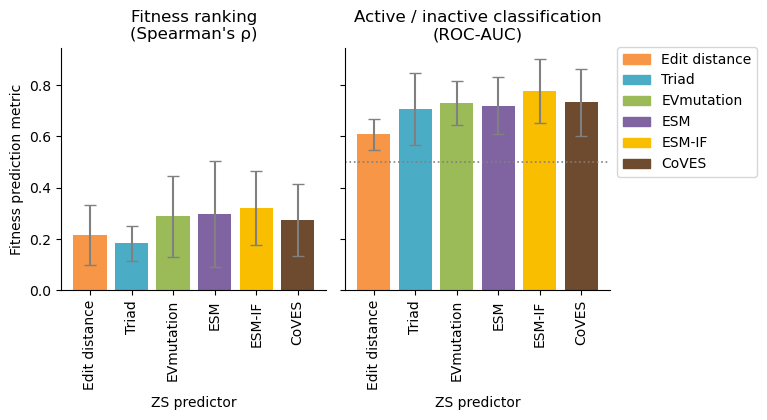

In [16]:
# Plotting
fig, axes = plt.subplots(1,2, figsize=(6, 4), sharey=True)

for m, ax in zip(avg_bar_type_df["metric"].unique(), axes):

    slice_m = avg_bar_type_df[(avg_bar_type_df["metric"] == m) & (avg_bar_type_df["type_"] == "Both")].copy()

        # Perform t-tests between each pair of ZS predictors within the metric
    p_values = {}
    for zs1 in ZS_OPTS:
        for zs2 in ZS_OPTS:
            if zs1 < zs2:  # To ensure each pair is only tested once
                group1 = slice_m[slice_m['zs'] == zs1]['value']
                group2 = slice_m[slice_m['zs'] == zs2]['value']
                _, p_value = ttest_ind(group1, group2)
                p_values[f"{zs1} vs {zs2}"] = p_value

    means = slice_m[slice_m["calc"] == "mean"]["value"].tolist()

    bars = ax.bar(
        [ZS_OPTS_APPENDED[zs] for zs in ZS_OPTS],
        means,
        yerr=slice_m[slice_m["calc"] == "std"]["value"].tolist(),
        capsize=4,
        color=[
            five_zs[c]
            for c in ZS_OPTS
        ],
        width=0.8,
        error_kw={'ecolor': 'gray', 'capthick': 1} 
    )

        # Annotating p-values
    for i, (pair, p_value) in enumerate(p_values.items()):
        if p_value < 0.05:
            ax.text(i, max(means) + 10, "*", ha="center", color="gray")



# Show p-values on the bars
# for bar, pvalue in zip(bars, p_dict.values()):
#     y = bar.get_height()
#     ax.text(bar.get_x() + bar.get_width() / 2, y, f'p={pvalue:.3f}', ha='center', va='bottom' if y < 0 else 'top', color='black')
# Hide the top and right spines

    if "classification" in m:
        ax.axhline(0.5, color='gray', linestyle='dotted', lw=1.2)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.xaxis.grid(False)
    ax.yaxis.grid(False)  # Disable the y-axis grid lines

    ax.tick_params(axis='x', rotation=90)

    # Adding labels and titles
    ax.set_title(m)
    ax.set_xlabel("ZS predictor")
    # ax.set_ylabel(m)
axes[0].set_ylabel("Fitness prediction metric")

# Create custom handles for the legend
handles = [mpatches.Patch(color=five_zs[zs], label=ZS_OPTS_APPENDED[zs]) for zs in ZS_OPTS]

# Create a figure-wide legend
fig.legend(handles=handles, loc='upper left', bbox_to_anchor=(1, 0.925)) # title="ZS Predictor")
plt.tight_layout(pad=.0, h_pad=-.0, w_pad=1.0)
# ax.set_title("MSA correlation with different ZS scores")

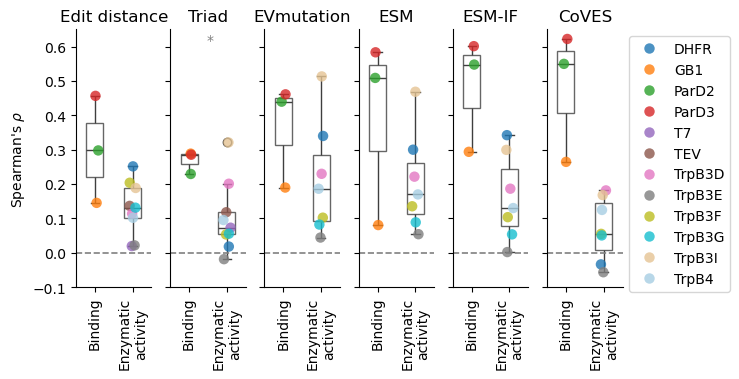

In [42]:
fig, axes = plt.subplots(1, 6, figsize=(7.2, 3.6), sharey=True)

for z, zs in enumerate(ZS_OPTS):
    ax = axes.flatten()[z]
    x = "all_" + zs.split("_")[0] + "_rho"
    bar_type_df = slice_zs[["lib", "type", x]].sort_values(["lib", "type"]).copy()

    sns.boxplot(
        # x="Type", y="Rho",
        x="type",
        y=x,
        data=bar_type_df,
        order=["Binding", "Enzymatic activity"],
        width=0.45,
        ax=ax,
        # color=PRESENTATION_PALETTE_SATURATE["light_gray"],# palette="pastel", showmeans=True
        boxprops={
            "facecolor": "None",
            "edgecolor": PRESENTATION_PALETTE_SATURATE["gray"],
        },
    )
    sns.stripplot(
        # x="Type",
        # y="Rho",
        x="type",
        y=x,
        data=bar_type_df,
        order=["Binding", "Enzymatic activity"],
        hue="lib",
        hue_order=bar_type_df["lib"].unique(),
        jitter=True,
        size=7.5,
        # dodge=True,
        palette=sns.color_palette("tab10").as_hex() + ['#e5c494', '#a6cee3'],
        marker="o",
        alpha=0.8,
        ax=ax,
    )

    labels = [
        label.get_text()
        .replace("Enzymatic activity", "Enzymatic\nactivity")
        # .replace("Binding", "Binding\ninteraction")
        for label in ax.get_xticklabels()
    ]
    ax.set_xlabel("")
    ax.set_xticklabels(labels, rotation=90, ha="center")
    ax.set_ylim(-0.1, 0.65)
    # ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])
    ax.set_title(ZS_OPTS_LEGEND[x.split("_")[1] + "_score"])
    ax.axhline(0, color='gray', lw=1.2, ls='--')

    # Hide the top and right spine
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    if z != len(ZS_OPTS) - 1:
        ax.legend().remove()
    else:
        ax.legend(loc="upper left", bbox_to_anchor=(1, 1.0))
    if z == 0:
        ax.set_ylabel(r"Spearman's $\rho$")
    else:
        ax.set_ylabel("")

    t_val, p_value = ttest_ind(
        list(bar_type_df[bar_type_df["type"] == "Binding"][x]),
        list(bar_type_df[bar_type_df["type"] == "Enzymatic activity"][x]),
        equal_var=False,
    )
    # significance = '*' if p_value < 0.05 else 'ns'  # ns stands for not significant
    # print(f"Comparison of {ms[i]} between {ens_types[p]} and {ens_types[q]} : t={t_val:.3f} and p={p_value:.3f}")

    # Draw a line between points
    p = 0.1
    q = 1
    annot_y = 0.6
    if p_value < 0.05:
        # ax.plot([p+0.5*(q-p), q-0.5*(q-p)], [annot_y, annot_y], color='gray', lw=1.5)
        ax.text((p + q) * 0.5, annot_y, "*", ha="center", va="bottom", color="gray")
        
    # if z == 2:
    #     ax.set_xlabel("ZS type")
    # else:
    #
    # # plt.title("Triad ZS statistically different for types")
    # plt.ylabel("Type")
    # plt.xlabel(ZS_OPTS_LEGEND[x.split("_")[1]+"_score"] + r"’s fitness prediction Spearman's $\rho$")
    # # plt.legend(title="Group", loc="upper left", bbox_to_anchor=(1, 1.05))
    # plt.legend().remove()
plt.tight_layout(pad=0, h_pad=-0.0, w_pad=1.0)

ed_score : t=-2.403 and p=0.041
Triad_score : t=1.116 and p=0.328
ev_score : t=nan and p=nan
esm_score : t=nan and p=nan
esmif_score : t=nan and p=nan
coves_score : t=nan and p=nan


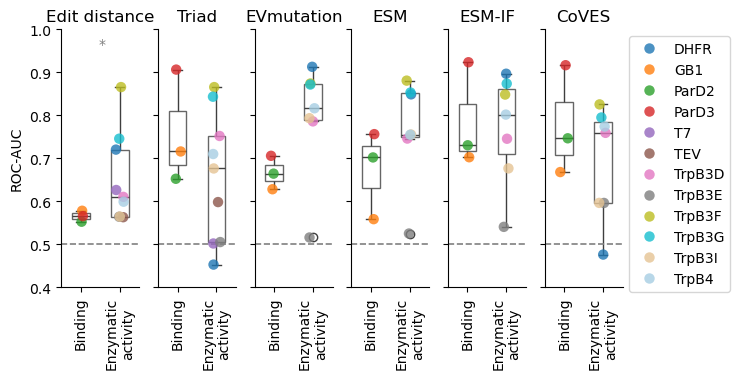

In [44]:
fig, axes = plt.subplots(1, 6, figsize=(7.2, 3.6), sharey=True)

for z, zs in enumerate(ZS_OPTS):
    ax = axes.flatten()[z]
    x = "all_" + zs.split("_")[0] + "_rocauc"
    bar_type_df = slice_zs[["lib", "type", x]].sort_values(["lib", "type"]).copy()

    sns.boxplot(
        # x="Type", y="Rho", 
        x="type", y=x, 
        data=bar_type_df, width=0.45, 
        ax=ax,
        order=["Binding", "Enzymatic activity"],
        # color=PRESENTATION_PALETTE_SATURATE["light_gray"],# palette="pastel", showmeans=True
        boxprops={'facecolor': 'None', 'edgecolor': PRESENTATION_PALETTE_SATURATE["gray"]},
    )
    sns.stripplot(
        # x="Type",
        # y="Rho",
        x="type",
        y=x,
        data=bar_type_df,
        order=bar_type_df['type'].unique(),
        hue="lib",
        hue_order=bar_type_df['lib'].unique(),
        jitter=True,
        size=7.5,
        # dodge=True,
        palette=sns.color_palette("tab10").as_hex() + ['#e5c494', '#a6cee3'],
        marker="o",
        alpha=0.8,
        ax=ax
    )

    labels = [label.get_text().replace('Enzymatic activity', 'Enzymatic\nactivity') for label in ax.get_xticklabels()]
    ax.set_xlabel("")
    ax.set_xticklabels( labels, rotation=90, ha="center")
    ax.set_ylim(0.4, 1)
    # ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])
    ax.set_title(ZS_OPTS_LEGEND[x.split("_")[1]+"_score"])
    
    # Hide the top and right spine
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.axhline(0.5, color='gray', lw=1.2, ls='--')
    
    
    if z != len(ZS_OPTS)-1:
        ax.legend().remove()
    else:
        ax.legend(loc="upper left", bbox_to_anchor=(1, 1.0))
    if z == 0:
        ax.set_ylabel("ROC-AUC")
    else:
        ax.set_ylabel("")

    t_val, p_value = ttest_ind(
        list(bar_type_df[bar_type_df["type"]=="Binding"][x]),
        list(bar_type_df[bar_type_df["type"]=="Enzymatic activity"][x]),
        equal_var=False,
    )

    
    # significance = '*' if p_value < 0.05 else 'ns'  # ns stands for not significant
    print(f"{zs} : t={t_val:.3f} and p={p_value:.3f}")

    # Draw a line between points
    p = 0.1
    q = 1
    annot_y = 0.95
    if p_value < 0.05:
        # ax.plot([p+0.5*(q-p), q-0.5*(q-p)], [annot_y, annot_y], color='gray', lw=1.5)
        ax.text((p+q)*.5, annot_y, "*", ha='center', va='bottom', color='gray')

    # if z == 2:
    #     ax.set_xlabel("ZS type")
    # else:
    #     
    # # plt.title("Triad ZS statistically different for types")
    # plt.ylabel("Type")
    # plt.xlabel(ZS_OPTS_LEGEND[x.split("_")[1]+"_score"] + r"’s fitness prediction Spearman's $\rho$")
    # # plt.legend(title="Group", loc="upper left", bbox_to_anchor=(1, 1.05))
    # plt.legend().remove()
plt.tight_layout(pad=0, h_pad=-.0, w_pad=1.0)

In [18]:
get_msa_dict = {}

for l, v in EV_META.items():
    if l != "TrpB":
        if "chosen" in v.keys():
            get_msa_dict[l] = v["chosen"]["sequences"]
        else:
            get_msa_dict[l] = v["recommended"]["sequences"]
    else:
        ls = [l+ "3"+ app for app in [chr(i) for i in range(ord('A'), ord('I')+1)]]+ ["TrpB4"]
        for t in ls:
            if "chosen" in v.keys():
                get_msa_dict[t] = v["chosen"]["sequences"]
            else:
                get_msa_dict[t] = v["recommended"]["sequences"]

msa_df = pd.DataFrame(get_msa_dict, index=["MSA"]).T.reset_index()
msa_df.columns=["lib", "msa"]
msa_df

,lib,msa
0,DHFR,16042
1,ParD2,6789
2,ParD3,6784
3,GB1,29
4,TrpB3A,5816
5,TrpB3B,5816
6,TrpB3C,5816
7,TrpB3D,5816
8,TrpB3E,5816
9,TrpB3F,5816


In [19]:
zs_append_msa = pd.merge(zs_df, msa_df, on="lib")
zs_append_msa

,lib,all_ed_rho,all_ed_ndcg,all_ed_rocauc,all_Triad_rho,all_Triad_ndcg,all_Triad_rocauc,all_ev_rho,all_ev_ndcg,all_ev_rocauc,...,single_msanoif-comb_ndcg,single_msanoif-comb_rocauc,single_msa-comb_rho,single_msa-comb_ndcg,single_msa-comb_rocauc,single_structnmsa-comb_rho,single_structnmsa-comb_ndcg,single_structnmsa-comb_rocauc,type,msa
0,DHFR,0.251154,0.914803,0.719973,0.017801,0.874707,0.452238,0.339650,0.947058,0.912765,...,0.891175,0.917361,0.553279,0.891577,0.911111,-0.212895,0.800908,0.320833,Enzymatic activity,16042
1,GB1,0.144928,0.687396,0.577572,0.288282,0.764049,0.715632,0.189509,0.721558,0.627690,...,0.686378,0.588512,0.774073,0.784778,0.897363,0.811746,0.786033,0.916196,Binding,29
2,ParD2,0.297520,0.902898,0.552103,0.227370,0.843746,0.652049,0.440248,0.915307,0.664011,...,0.969377,0.842105,0.676766,0.976464,0.947368,0.687594,0.988024,0.964912,Binding,6789
3,ParD3,0.456627,0.953525,0.564976,0.284501,0.886169,0.906254,0.460576,0.955882,0.705520,...,0.993785,NaN,0.369282,0.995510,NaN,0.337783,0.993260,NaN,Binding,6784
4,TrpB3A,0.146519,0.672480,0.608694,-0.016552,0.488693,0.664616,0.105892,0.743685,0.657328,...,0.887328,0.862269,0.490425,0.892182,0.850694,0.097446,0.525140,0.646991,Enzymatic activity,5816
5,TrpB3B,0.048451,0.638318,0.551217,0.041425,0.348852,0.653659,0.056590,0.672504,0.583225,...,0.914430,0.975309,0.373545,0.924416,0.981481,0.155952,0.795325,0.796296,Enzymatic activity,5816
6,TrpB3C,0.055999,0.646208,0.605496,0.043581,0.680187,0.621564,0.050793,0.660263,0.539872,...,0.873296,0.981818,0.380206,0.942209,1.000000,0.336462,0.934191,0.996970,Enzymatic activity,5816
7,TrpB3D,0.119253,0.750375,0.609910,0.213946,0.761741,0.751696,0.233182,0.822937,0.785684,...,0.875823,0.745658,0.408905,0.854952,0.682382,0.386136,0.814950,0.699132,Enzymatic activity,5816
8,TrpB3E,0.013191,0.728204,0.563633,-0.017332,0.593711,0.504706,0.017571,0.852058,0.515337,...,0.938319,0.991392,0.692477,0.914564,0.958393,-0.076301,0.511023,0.467719,Enzymatic activity,5816
9,TrpB3F,0.209446,0.763770,0.865507,0.093448,0.688977,0.865511,0.103260,0.804297,0.873863,...,0.872552,0.617246,0.375107,0.868215,0.634615,0.500940,0.903963,0.714640,Enzymatic activity,5816


In [20]:
zs_metric_map = {
    "rho": "Fitness ranking\n(Spearman's ρ)",
    "rocauc": "Active / inactive classification\n(ROC-AUC)"
}


In [22]:
slice_zs = zs_append_msa[zs_append_msa["lib"].isin(active_lib_list)]

# rho_dict = {}
# p_dict = {}

# rho_dict_bind = {}
# p_dict_bind = {}

# rho_dict_ea = {}
# p_dict_ea = {}

df_msa = pd.DataFrame()

for zs in ZS_OPTS[:-1]:
    for m in ["rho", "rocauc"]:
        zs_col = "all_" + zs.replace("score", m)

        # for t in ["Binding", "Enzymatic activity"]:
        #     type_df = slice_zs[slice_zs["type"] == t]
            
        #     zs_rho_ea, zs_p_ea = spearmanr(type_df[zs_col], type_df["msa"])
        #     df_msa = df_msa._append({"type":t, "zs": zs, "metric": m, "value": zs_rho_ea, "p": zs_p_ea}, ignore_index=True)

        zs_rho_both, zs_p_both= spearmanr(slice_zs[zs_col], slice_zs["msa"])
        df_msa = df_msa._append({"type": "Both", "zs": zs, "metric": m, "value": zs_rho_both, "p": zs_p_both}, ignore_index=True)

df_msa["zs"] = df_msa["zs"].map(ZS_OPTS_LEGEND)
df_msa["metric"] = df_msa["metric"].map(zs_metric_map)
df_msa = df_msa.replace({"Binding": "Binding interaction"})

df_msa

,type,zs,metric,value,p
0,Both,Edit distance,Fitness ranking\n(Spearman's ρ),0.641821,0.045440
1,Both,Edit distance,Active / inactive classification\n(ROC-AUC),-0.136558,0.706788
2,Both,Triad,Fitness ranking\n(Spearman's ρ),-0.218492,0.544219
3,Both,Triad,Active / inactive classification\n(ROC-AUC),-0.300427,0.398988
4,Both,EVmutation,Fitness ranking\n(Spearman's ρ),0.457468,0.183728
5,Both,EVmutation,Active / inactive classification\n(ROC-AUC),0.279943,0.433400
6,Both,ESM,Fitness ranking\n(Spearman's ρ),0.710100,0.021396
7,Both,ESM,Active / inactive classification\n(ROC-AUC),0.273115,0.445165
8,Both,ESM-IF,Fitness ranking\n(Spearman's ρ),0.594026,0.070171
9,Both,ESM-IF,Active / inactive classification\n(ROC-AUC),0.505264,0.136307


Fitness ranking
(Spearman's ρ) ed_score: rho=0.642, p=0.045
is significant!
Fitness ranking
(Spearman's ρ) Triad_score: rho=-0.218, p=0.544
Fitness ranking
(Spearman's ρ) ev_score: rho=0.457, p=0.184
Fitness ranking
(Spearman's ρ) esm_score: rho=0.710, p=0.021
is significant!
Fitness ranking
(Spearman's ρ) esmif_score: rho=0.594, p=0.070
Active / inactive classification
(ROC-AUC) ed_score: rho=-0.137, p=0.707
Active / inactive classification
(ROC-AUC) Triad_score: rho=-0.300, p=0.399
Active / inactive classification
(ROC-AUC) ev_score: rho=0.280, p=0.433
Active / inactive classification
(ROC-AUC) esm_score: rho=0.273, p=0.445
Active / inactive classification
(ROC-AUC) esmif_score: rho=0.505, p=0.136


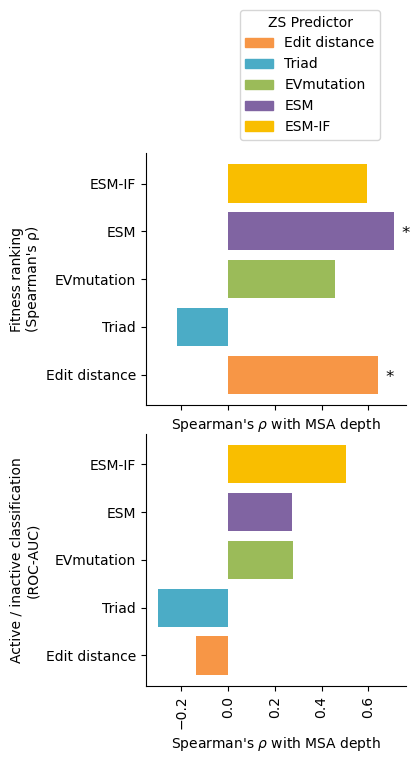

In [45]:
fig, axes = plt.subplots(2, 1, figsize=(4, 6), sharex=True)

for i, (m, ax) in enumerate(zip(df_msa["metric"].unique(), axes)):
    # Filter for the specific metric and type
    slice_m = df_msa[(df_msa["metric"] == m) & (df_msa["type"] == "Both")].copy()

    # Plot the bars
    bars = ax.barh(
        [ZS_OPTS_APPENDED[zs] for zs in ZS_OPTS[:-1]],
        slice_m["value"],
        color=[five_zs[c] for c in ZS_OPTS[:-1]],
        height=0.8
    )

    # Annotate p-values on the bars
    for j, bar in enumerate(bars):
        # Get the p-value corresponding to this bar
        p_val = slice_m["p"].values[j]  # Assuming the p-values are in the "p" column
        rho_val = slice_m["value"].values[j]  # Corresponding rho value

        print(f"{m} {ZS_OPTS[j]}: rho={rho_val:.3f}, p={p_val:.3f}")

        # Annotate the p-value or a significance marker
        if p_val < 0.05:
            print("is significant!")
            ax.text(
                bar.get_width() + 0.05, bar.get_y() + bar.get_height() / 2 - 0.05,
                "*", ha="center", va="center", color="black", fontsize=12
            )
        # else:
        #     ax.text(
        #         bar.get_width() + 0.02, bar.get_y() + bar.get_height() / 2,
        #         f"p={p_val:.3f}", ha="left", va="center", color="black"
        #     )

    # Hide the top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.xaxis.grid(False)
    ax.yaxis.grid(False)  # Disable the y-axis grid lines

    ax.set_xlabel(r"Spearman's $\rho$ with MSA depth")
    
    # Adding labels and titles
    ax.set_ylabel(m)
    ax.tick_params(axis='x', rotation=90)

# Create custom handles for the legend
handles = [mpatches.Patch(color=five_zs[zs], label=ZS_OPTS_APPENDED[zs]) for zs in ZS_OPTS[:-1]]

# Create a figure-wide legend
fig.legend(handles=handles, loc='upper center', bbox_to_anchor=(0.75, 1.25), title="ZS Predictor")
plt.tight_layout(pad=.0, h_pad=-.0, w_pad=1.0)

plt.show()
